# The rules of probability

Some dependencies

In [71]:
import numpy as np
import matplotlib.pyplot as plt

Params

In [72]:
# Sample size
N = 15

# Given two random variables X,Y.
np.random.seed(0)
X = np.random.randint(1, 5, N)
Y = np.random.randint(1, 3, N)

# Add random noise for grid positioning and no overlapping of samples.
noise_x = np.random.uniform(-0.1, 0.1, N)
noise_y = np.random.uniform(-0.1, 0.1, N)

print("Random variable X:",X)
print("Random variable Y:",Y)

Random variable X: [1 4 2 1 4 4 4 4 2 4 2 3 1 4 3]
Random variable Y: [1 1 1 1 2 1 2 2 1 1 2 2 2 2 1]


## Joint probability

With the two random variables, we make with the ocurrences our distribution p(x,y)

$p(X=x_i,Y=y_j) = \frac{n_{ij}}{N}$

In [73]:
# Joint distribution p(X,Y)
joint_dist = np.zeros((4, 2))
for x in range(1, 5):
    for y in range(1, 3):
        joint_dist[x-1, y-1] = np.sum((X == x) & (Y == y))

print("Ocurrences:")
print(np.transpose(joint_dist))
print("Ocurrence ij divided by N:")

# nij/N
joint_prob = joint_dist / N
print(np.transpose(joint_prob))


Ocurrences:
[[2. 2. 1. 3.]
 [1. 1. 1. 4.]]
Ocurrence ij divided by N:
[[0.13333333 0.13333333 0.06666667 0.2       ]
 [0.06666667 0.06666667 0.06666667 0.26666667]]


Then we can get the marginal probabilities

$p(X=x_i) = \frac{c_{i}}{N}$

$p(X=y_j) = \frac{r_{j}}{N}$

$c_i$ are the columns of distribution

$r_j$ are the rows of distribution

## Addition Rule and Marginal Probability

In [74]:
print("Ocurrences:")
print(np.transpose(joint_dist))
#ci/N
marginal_X = np.sum(joint_dist, axis=1)/15
#rj/N
marginal_Y = np.sum(joint_dist, axis=0)/15
print()
print("Marginal probabilieties of X:\n",marginal_X)
print()
print("Marginal probabilieties of Y:\n",marginal_Y)

Ocurrences:
[[2. 2. 1. 3.]
 [1. 1. 1. 4.]]

Marginal probabilieties of X:
 [0.2        0.2        0.13333333 0.46666667]

Marginal probabilieties of Y:
 [0.53333333 0.46666667]


Implicitly, we discover the addition rule:

$p(X) = \sum_{Y} p(X,Y)$

## Product Rule and Conditional Probability

Also we can get conditional probabilities

$p(Y=y_i|X=x_j) = \frac{n_{ij}}{c_i}$

$p(X=x_i|Y=y_j) = \frac{n_{ij}}{r_j}$

In [75]:
print("Ocurrences:")
print(np.transpose(joint_dist))

row_sums = np.sum(joint_dist, axis=1)
col_sums = np.sum(joint_dist, axis=0)

#nij/ci and nij/rj
cond_prob_Y_given_X = np.zeros_like(joint_dist)
cond_prob_X_given_Y = np.zeros_like(joint_dist)

for i in range(joint_dist.shape[0]):
    for j in range(joint_dist.shape[1]):
        cond_prob_Y_given_X[i, j] = joint_dist[i, j] / row_sums[i] if row_sums[i] != 0 else 0
        cond_prob_X_given_Y[i, j] = joint_dist[i, j] / col_sums[j] if col_sums[j] != 0 else 0

print("\nConditional Probabilities P(Y|X):")
for i in range(cond_prob_Y_given_X.shape[0]):
    for j in range(cond_prob_Y_given_X.shape[1]):
        print(f"P(Y = {j+1} | X = {i+1}) = {cond_prob_Y_given_X[i, j]:.2f}")

print("\nConditional Probabilities P(X|Y):")
for j in range(cond_prob_X_given_Y.shape[1]):
    for i in range(cond_prob_X_given_Y.shape[0]):
        print(f"P(X = {i+1} | Y = {j+1}) = {cond_prob_X_given_Y[i, j]:.2f}")

Ocurrences:
[[2. 2. 1. 3.]
 [1. 1. 1. 4.]]

Conditional Probabilities P(Y|X):
P(Y = 1 | X = 1) = 0.67
P(Y = 2 | X = 1) = 0.33
P(Y = 1 | X = 2) = 0.67
P(Y = 2 | X = 2) = 0.33
P(Y = 1 | X = 3) = 0.50
P(Y = 2 | X = 3) = 0.50
P(Y = 1 | X = 4) = 0.43
P(Y = 2 | X = 4) = 0.57

Conditional Probabilities P(X|Y):
P(X = 1 | Y = 1) = 0.25
P(X = 2 | Y = 1) = 0.25
P(X = 3 | Y = 1) = 0.12
P(X = 4 | Y = 1) = 0.38
P(X = 1 | Y = 2) = 0.14
P(X = 2 | Y = 2) = 0.14
P(X = 3 | Y = 2) = 0.14
P(X = 4 | Y = 2) = 0.57


Now given the joint probability, conditional probability and marginal probability the following can be deduced

$
p(X,Y) = \frac{n_{ij}}{N} ; \quad p(X) = \frac{c_i}{N} ; \quad p(Y|X) = \frac{n_{ij}}{c_i}
$

$
p(X,Y) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \cdot \frac{c_i}{N}
$

$
p(X,Y) = p(Y|X) p(X)
$





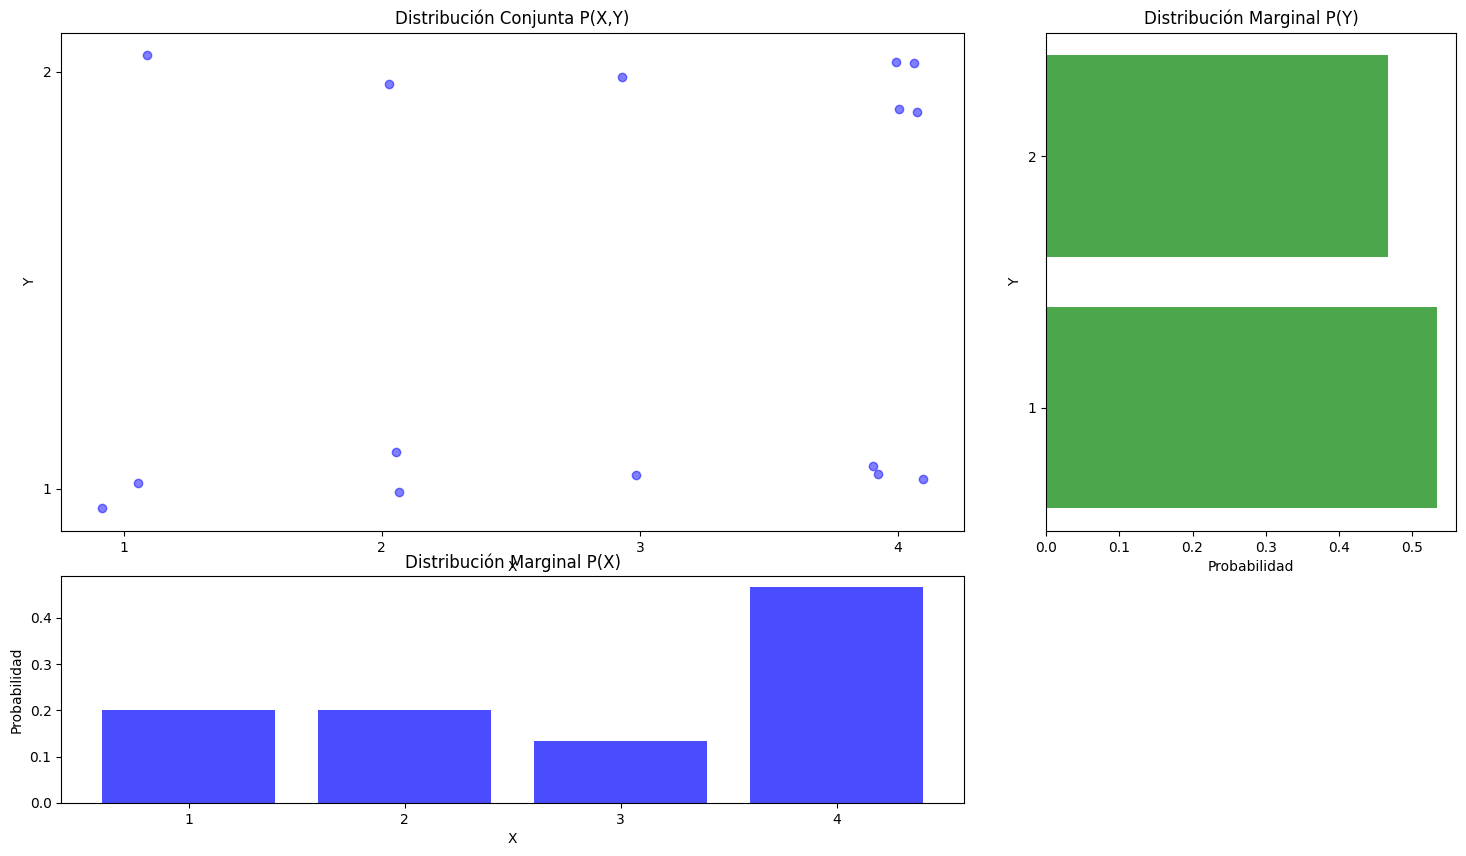

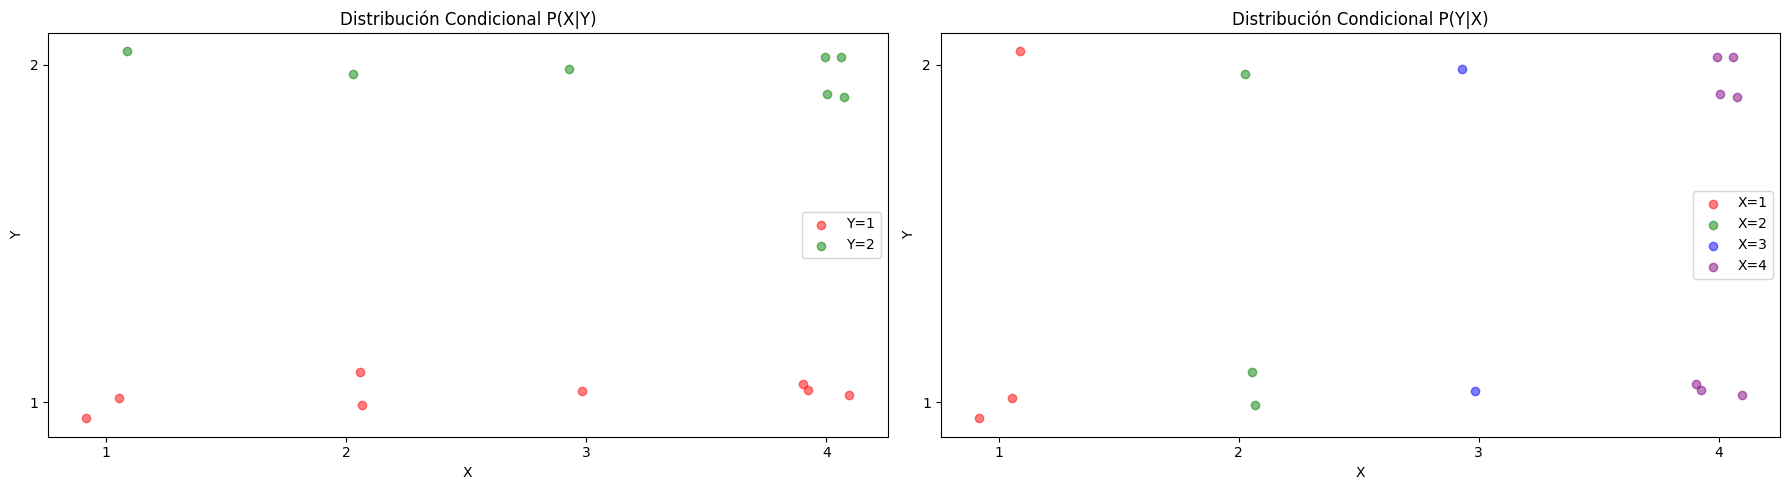

In [76]:
fig = plt.figure(figsize=(18, 10))

# Subplot joint distribution p(X,Y)
ax_joint = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
ax_joint.scatter(X + noise_x, Y + noise_y, alpha=0.5, color='blue')
ax_joint.set_title('Distribución Conjunta P(X,Y)')
ax_joint.set_xlabel('X')
ax_joint.set_ylabel('Y')
ax_joint.set_xticks([1, 2, 3, 4])
ax_joint.set_yticks([1, 2])

# Subplot marginal distribution p(X)
ax_marginal_x = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax_marginal_x.bar(range(1, 5), marginal_X, color='blue', alpha=0.7)
ax_marginal_x.set_title('Distribución Marginal P(X)')
ax_marginal_x.set_xlabel('X')
ax_marginal_x.set_ylabel('Probabilidad')
ax_marginal_x.set_xticks([1, 2, 3, 4])

# Subplot marginal distribution p(Y)
ax_marginal_y = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax_marginal_y.barh(range(1, 3), marginal_Y, color='green', alpha=0.7)
ax_marginal_y.set_title('Distribución Marginal P(Y)')
ax_marginal_y.set_xlabel('Probabilidad')
ax_marginal_y.set_ylabel('Y')
ax_marginal_y.set_yticks([1, 2])

fig_cond = plt.figure(figsize=(18, 5))

# Subplot conditional distribution P(X|Y)
ax_cond_x_given_y = plt.subplot(1, 2, 1)
colors = ['red', 'green']
for y in range(1, 3):
    ax_cond_x_given_y.scatter(X[Y == y] + noise_x[Y == y], Y[Y == y] + noise_y[Y == y], alpha=0.5, color=colors[y-1], label=f'Y={y}')
ax_cond_x_given_y.set_title('Distribución Condicional P(X|Y)')
ax_cond_x_given_y.set_xlabel('X')
ax_cond_x_given_y.set_ylabel('Y')
ax_cond_x_given_y.set_xticks([1, 2, 3, 4])
ax_cond_x_given_y.set_yticks([1, 2])
ax_cond_x_given_y.legend()

# Subplot conditional distribution P(Y|X)
ax_cond_y_given_x = plt.subplot(1, 2, 2)
colors = ['red', 'green', 'blue', 'purple']
for x in range(1, 5):
    ax_cond_y_given_x.scatter(X[X == x] + noise_x[X == x], Y[X == x] + noise_y[X == x], alpha=0.5, color=colors[x-1], label=f'X={x}')
ax_cond_y_given_x.set_title('Distribución Condicional P(Y|X)')
ax_cond_y_given_x.set_xlabel('X')
ax_cond_y_given_x.set_ylabel('Y')
ax_cond_y_given_x.set_xticks([1, 2, 3, 4])
ax_cond_y_given_x.set_yticks([1, 2])
ax_cond_y_given_x.legend()

plt.tight_layout()
plt.show()


Also we can get the bayes theorem with the simmetry property

$p(X,Y)=p(Y,X)$

$p(Y|X)p(X) = p(X|Y)p(Y)$

$p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}$

also doing some cool shit, with the addition rule we can get another view of p(X)

$p(Y|X)p(X) = p(X|Y)p(Y)$

$p(X,Y) = p(X|Y)p(Y)$

$p(X) = \sum_{Y}p(X|Y)p(Y)$